<a href="https://colab.research.google.com/github/shanikairoshi/Communication-Efficient-DUQFL/blob/main/main_generalized_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %%capture
# %%capture
!pip install genomic-benchmarks
!pip install qiskit qiskit_machine_learning qiskit_algorithms qiskit-aer




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
from pathlib import Path
PROJ = Path.cwd() / "tduqfl_mnist"
if str(PROJ) not in sys.path:
    sys.path.insert(0, str(PROJ))
import sys
sys.path.append('/content/drive/MyDrive/Teleportation/tduqfl_mnist/tDuQFL_Project')
# ─── 5. Assemble filenames for each artifact ─────────────────────────────────
drive_root = "/content/drive/MyDrive/Teleportation/tduqfl_mnist/tDuQFL_Project/"

In [4]:

#from configs.dataset_genome_noniid.py import *     # swap to other configs as needed

In [5]:
from common.imports import *
from configs.dataset_genome import *     # swap to other configs as needed
from io_utils.naming import stamp_now, build_param_str, make_filenames

# main.py or notebook cell
from configs.base_config import *
from io_utils.naming import build_param_str, stamp_now, make_filenames

param_str = build_param_str(
    num_clients,
    num_federated_layers,
    num_deep_unfolding_iterations,
    initial_learning_rate,
    initial_perturbation,
)
stamp, date_str = stamp_now()

best_client_csv_file, global_csv_file, local_csv_file, validation_csv_file = make_filenames(
    drive_root=drive_root,
    dataset_name=dataset_name,
    split_type=split_type,
    date_str=date_str,
    aggregation=aggregation,
    select_upload=select_upload,
    use_deep_unfolding=use_deep_unfolding,
    gamma=gamma,
    uplink_mode=uplink_mode,
    downlink_mode=downlink_mode,
    up_k_ratio=up_k_ratio,
    up_bits=up_bits,
    down_mask_ratio=down_mask_ratio,
    down_scale=down_scale,
    noise_preset=noise_preset,
    shots_used=shots_used,
    param_str=param_str,
)
print(best_client_csv_file)
print(global_csv_file)
print(local_csv_file)
print(validation_csv_file)


from io_utils.csv_logger import init_local_csv, init_best_csv, init_validation_csv

# Create folders + write headers
init_best_csv(best_client_csv_file)

local_headers = [
    "Federated Round", "Client Number", "Iteration",
    "Objective Function Value", "Training Accuracy", "Test Accuracy",
    "Learning Rate", "Perturbation"
]
init_local_csv(local_csv_file, local_headers)

init_validation_csv(validation_csv_file)

# Do NOT pre-init global_csv_file here because your save_accuracies_to_csv()
# already writes the header each time it runs (in 'w' mode).

/usr/local/lib/python3.12/dist-packages/genomic_benchmarks/utils/datasets.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Qiskit: 1.4.5
qiskit_aer available?: True
/content/drive/MyDrive/Teleportation/tduqfl_mnist/result/best_all_0.14/tDuQFL_MNIST_NONIID_AGG-best_SU-all_DU-on_g0p5_UL-quantum__DL-quantum_Q-on_med_shots256_params[clients5_layers10_du5_lr0p14_pert0p14]_20_10_2025_Best_Client.csv
/content/drive/MyDrive/Teleportation/tduqfl_mnist/result/best_all_0.14/tDuQFL_MNIST_NONIID_AGG-best_SU-all_DU-on_g0p5_UL-quantum__DL-quantum_Q-on_med_shots256_params[clients5_layers10_du5_lr0p14_pert0p14]_20_10_2025_Global.csv
/content/drive/MyDrive/Teleportation/tduqfl_mnist/result/best_all_0.14/tDuQFL_MNIST_NONIID_AGG-best_SU-all_DU-on_g0p5_UL-quantum__DL-quantum_Q-on_med_shots256_params[clients5_layers10_du5_lr0p14_pert0p14]_20_10_2025_Local.csv
/content/drive/MyDrive/Teleportation/tduqfl_mnist/result/best_all_0.14/tDuQFL_MNIST_N

Load and Split data

run federated loop and plot

In [6]:
from training.loop import run_federated_training
from configs.base_config import use_teleportation as CFG_TEL, noise_preset, shots_used
from training.metrics import metrics_init, metrics_log_round, metrics_finalize, compute_auc,metrics_summarize
from viz.plots import plot_accuracy_curve, plot_val_loss, plot_time_per_round, plot_fidelity_vs_delta_acc, plot_beta_hist, plot_client_fairness_last_round
# Initialize metrics store once
metrics_store = metrics_init(
    log_path=os.path.join(drive_root, "teleport_metrics_Perturb_shrink.csv")
)

#new
from ml import optimizers as mlopt
from configs.base_config import drive_root
import os

mlopt.meta_trace_enable(
    path=os.path.join(drive_root, "meta_trace.csv"),  # or None to skip CSV
    every=5                                           # print every 5 callbacks
)

# examples/run_switch.py
from configs.base_config import *
from training.data_factory import build_clients_and_meta
from training.loop import run_federated_training
from training.metrics import metrics_init
import os, numpy as np

param_str = build_param_str(
    num_clients,
    num_federated_layers,
    num_deep_unfolding_iterations,
    initial_learning_rate,
    initial_perturbation,
)


# 1) Build clients + meta from config
clients, test_sequences, test_labels, num_features = build_clients_and_meta(
    dataset_name=dataset_name,
    split_type=split_type,
    num_clients=num_clients,
    num_epochs=num_epochs,
    samples_per_epoch=samples_per_epoch,
    word_size=word_size,
    global_seed=global_seed,
    mnist_n_features=mnist_n_features,
    mnist_digit_a=mnist_digit_a,
    mnist_digit_b=mnist_digit_b,
    breast_pca_n_features=breast_pca_n_features,
    non_iid_ratio=non_iid_ratio,
    quantity_variation=quantity_variation,
    noniid_seed=noniid_seed,
)

# 2) Validation set (use test as val if you don’t have a separate split)
X_val, y_val = test_sequences, test_labels

# 3) Outputs
os.makedirs(drive_root, exist_ok=True)


metrics = metrics_init(log_path=os.path.join(drive_root, "round_metrics.csv"))

# 4) Train
global_acc, clients_train, clients_test, round_times, val_losses, info_last = run_federated_training(
    clients=clients,
    num_federated_layers=num_federated_layers,
    num_deep_unfolding_iterations=num_deep_unfolding_iterations,
    initial_learning_rate=initial_learning_rate,
    initial_perturbation=initial_perturbation,
    num_features=num_features,
    best_client_csv_file=best_client_csv_file,
    global_csv_file=global_csv_file,
    local_csv_file=local_csv_file,
    validation_csv_file=validation_csv_file,
    test_sequences=test_sequences, test_labels=test_labels,
    X_val=X_val,
    y_val=y_val,
    metrics=metrics,
    aggregation=aggregation,                  # "best" or "fedavg"
    select_upload=select_upload,              # "all" or "winner_only" (used for best)
    use_deep_unfolding=use_deep_unfolding,    # True/False
    uplink_mode=uplink_mode,                  # "classical_full" | "seeded_sparse" | "quantum"
    downlink_mode=downlink_mode,              # "classical_full" | "seeded" | "quantum"
    down_seed_base=down_seed_base,
    down_scale=down_scale,
    down_mask_ratio=down_mask_ratio,
    up_bits=up_bits,
    up_k_ratio=up_k_ratio,
    use_teleportation_backend=True,
    noise_preset=noise_preset,
    shots_used=shots_used,
    client_hparams_csv_file=os.path.join(drive_root, f"hparams_{dataset_name}_{split_type}.csv"),
)

print("Global accuracy per round:", global_acc)

Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

[Round 0] Agg=best | Uplink=quantum | Downlink=quantum
[meta] cb#005 loss=1.679866 step=0.181 g_raw=+0.088 g_sm=+0.031 acc=1 | LR→0.140140 PERT→0.140000 (scale=0.04)
[meta] cb#010 loss=1.321019 step=0.1817 g_raw=+0.111 g_sm=+0.063 acc=1 | LR→0.140281 PERT→0.140001 (scale=0.04)
[meta] cb#015 loss=1.231199 step=0.06379 g_raw=+0.030 g_sm=+0.067 acc=1 | LR→0.140423 PERT→0.140002 (scale=0.04)
[meta] cb#020 loss=1.066174 step=0.07564 g_raw=+0.040 g_sm=+0.074 acc=1 | LR→0.140564 PERT→0.140003 (scale=0.04)
[meta] cb#025 loss=1.042973 step=0.1914 g_raw=+0.113 g_sm=+0.066 acc=1 | LR→0.140706 PERT→0.140004 (scale=0.04)
[client 0 | unfold 1] LR 0.140000->0.140706, PERT 0.140000->0.140004 | g_raw_mean=+0.106, g_sm_mean=+0.056
[meta] cb#030 loss=0.987435 step=0.08281 g_raw=+0.043 g_sm=+0.065 acc=1 | LR→0.140847 PERT→0.140005 (scale=0.04)
[meta] cb#035 loss=0.973490 step=0.1723 g_raw=+0.061 g_sm=+0.056 acc=1 | LR→0.140989 PERT→0.140006 (scale=0.04)
[meta] cb#040 loss=0.954770 step=0.1115 g_raw=+0.059

Training Progress:  10%|█         | 1/10 [11:43<1:45:28, 703.17s/it]

[Round   0] acc_g=0.536 (μ=0.554, σ=0.020, FG=0.038) | t=622.777s, val=1.059 | TEL β=NA, Fid μ=NA, σ=NA, p50=NA, p90=NA | Lat μ=NA, σ=NA, p90=NA | Inst μ=NA, σ=NA | Δ per-dim=NA, ||Δ||₂=NA, max|Δ|=NA | noise=med, shots=256
[Round 0] ↓=3B ↑=15B | (Σ↓=3B, Σ↑=15B)
[Round 1] Agg=best | Uplink=quantum | Downlink=quantum
[meta] cb#005 loss=1.704377 step=0.09423 g_raw=+0.038 g_sm=+0.036 acc=1 | LR→0.141920 PERT→0.140006 (scale=0.04)
[meta] cb#010 loss=1.389285 step=0.3339 g_raw=+0.147 g_sm=+0.054 acc=1 | LR→0.142063 PERT→0.140007 (scale=0.04)
[meta] cb#015 loss=1.321761 step=0.1504 g_raw=+0.048 g_sm=+0.053 acc=1 | LR→0.142206 PERT→0.140008 (scale=0.04)
[meta] cb#020 loss=1.165455 step=0.3366 g_raw=+0.192 g_sm=+0.063 acc=1 | LR→0.142349 PERT→0.140008 (scale=0.04)
[meta] cb#025 loss=1.111101 step=0.1776 g_raw=-0.029 g_sm=+0.058 acc=1 | LR→0.142492 PERT→0.140009 (scale=0.04)
[client 0 | unfold 1] LR 0.141778->0.142492, PERT 0.140006->0.140009 | g_raw_mean=+0.092, g_sm_mean=+0.048
[meta] cb#030 l

Training Progress:  20%|██        | 2/10 [22:47<1:30:44, 680.59s/it]

[Round   1] acc_g=0.568 (μ=0.560, σ=0.022, FG=0.039) | t=584.251s, val=1.039 | TEL β=NA, Fid μ=NA, σ=NA, p50=NA, p90=NA | Lat μ=NA, σ=NA, p90=NA | Inst μ=NA, σ=NA | Δ per-dim=NA, ||Δ||₂=NA, max|Δ|=NA | noise=med, shots=256
[Round 1] ↓=3B ↑=15B | (Σ↓=6B, Σ↑=30B)
[Round 2] Agg=best | Uplink=quantum | Downlink=quantum
[meta] cb#005 loss=1.908987 step=0.02362 g_raw=+0.188 g_sm=+0.035 acc=1 | LR→0.142833 PERT→0.140009 (scale=0.04)
[meta] cb#010 loss=1.291411 step=0.6204 g_raw=+0.306 g_sm=+0.089 acc=1 | LR→0.142977 PERT→0.140010 (scale=0.04)
[meta] cb#015 loss=0.931941 step=0.3307 g_raw=+0.142 g_sm=+0.103 acc=1 | LR→0.143122 PERT→0.140012 (scale=0.04)
[meta] cb#020 loss=0.783056 step=0.4192 g_raw=+0.172 g_sm=+0.103 acc=1 | LR→0.143266 PERT→0.140013 (scale=0.04)
[meta] cb#025 loss=0.764454 step=0.03476 g_raw=+0.015 g_sm=+0.087 acc=1 | LR→0.143411 PERT→0.140015 (scale=0.04)
[client 0 | unfold 1] LR 0.142690->0.143411, PERT 0.140009->0.140015 | g_raw_mean=+0.143, g_sm_mean=+0.077
[meta] cb#030 

Training Progress:  30%|███       | 3/10 [33:53<1:18:36, 673.80s/it]

[Round   2] acc_g=0.570 (μ=0.527, σ=0.033, FG=0.074) | t=584.751s, val=1.035 | TEL β=NA, Fid μ=NA, σ=NA, p50=NA, p90=NA | Lat μ=NA, σ=NA, p90=NA | Inst μ=NA, σ=NA | Δ per-dim=NA, ||Δ||₂=NA, max|Δ|=NA | noise=med, shots=256
[Round 2] ↓=3B ↑=15B | (Σ↓=9B, Σ↑=45B)
[Round 3] Agg=best | Uplink=quantum | Downlink=quantum
[meta] cb#005 loss=1.489735 step=0.4844 g_raw=+0.221 g_sm=+0.045 acc=1 | LR→0.143302 PERT→0.140012 (scale=0.04)
[meta] cb#010 loss=1.208602 step=0.1375 g_raw=+0.049 g_sm=+0.067 acc=1 | LR→0.143446 PERT→0.140012 (scale=0.04)
[meta] cb#015 loss=1.157209 step=0.04861 g_raw=+0.009 g_sm=+0.061 acc=1 | LR→0.143590 PERT→0.140013 (scale=0.04)
[meta] cb#020 loss=1.110479 step=0.04756 g_raw=+0.020 g_sm=+0.057 acc=1 | LR→0.143735 PERT→0.140014 (scale=0.04)
[meta] cb#025 loss=0.996791 step=0.2426 g_raw=+0.121 g_sm=+0.063 acc=1 | LR→0.143879 PERT→0.140015 (scale=0.04)
[client 0 | unfold 1] LR 0.143158->0.143879, PERT 0.140011->0.140015 | g_raw_mean=+0.101, g_sm_mean=+0.054
[meta] cb#030 

Training Progress:  40%|████      | 4/10 [45:20<1:07:53, 678.88s/it]

[Round   3] acc_g=0.571 (μ=0.520, σ=0.080, FG=0.161) | t=605.330s, val=1.034 | TEL β=NA, Fid μ=NA, σ=NA, p50=NA, p90=NA | Lat μ=NA, σ=NA, p90=NA | Inst μ=NA, σ=NA | Δ per-dim=NA, ||Δ||₂=NA, max|Δ|=NA | noise=med, shots=256
[Round 3] ↓=3B ↑=15B | (Σ↓=12B, Σ↑=60B)
[Round 4] Agg=best | Uplink=quantum | Downlink=quantum
[meta] cb#005 loss=1.539680 step=0.963 g_raw=+0.390 g_sm=+0.053 acc=1 | LR→0.143541 PERT→0.140012 (scale=0.04)
[meta] cb#010 loss=1.430542 step=0.2981 g_raw=+0.148 g_sm=+0.062 acc=1 | LR→0.143685 PERT→0.140012 (scale=0.04)
[meta] cb#015 loss=1.189510 step=0.1334 g_raw=+0.074 g_sm=+0.077 acc=1 | LR→0.143830 PERT→0.140013 (scale=0.04)
[meta] cb#020 loss=1.031604 step=0.01702 g_raw=+0.003 g_sm=+0.079 acc=1 | LR→0.143975 PERT→0.140014 (scale=0.04)
[meta] cb#025 loss=0.962972 step=0.3301 g_raw=+0.109 g_sm=+0.076 acc=1 | LR→0.144120 PERT→0.140015 (scale=0.04)
[client 0 | unfold 1] LR 0.143397->0.144120, PERT 0.140011->0.140015 | g_raw_mean=+0.119, g_sm_mean=+0.061
[meta] cb#030 l

Training Progress:  50%|█████     | 5/10 [57:23<57:55, 695.01s/it]  

[Round   4] acc_g=0.567 (μ=0.531, σ=0.050, FG=0.099) | t=643.123s, val=1.040 | TEL β=NA, Fid μ=NA, σ=NA, p50=NA, p90=NA | Lat μ=NA, σ=NA, p90=NA | Inst μ=NA, σ=NA | Δ per-dim=NA, ||Δ||₂=NA, max|Δ|=NA | noise=med, shots=256
[Round 4] ↓=3B ↑=15B | (Σ↓=15B, Σ↑=75B)
[Round 5] Agg=best | Uplink=quantum | Downlink=quantum
[meta] cb#005 loss=2.051051 step=0.3148 g_raw=+0.209 g_sm=+0.027 acc=1 | LR→0.143664 PERT→0.140012 (scale=0.04)
[meta] cb#010 loss=1.191131 step=0.4205 g_raw=+0.109 g_sm=+0.078 acc=1 | LR→0.143808 PERT→0.140013 (scale=0.04)
[meta] cb#015 loss=1.161227 step=0.1675 g_raw=+0.059 g_sm=+0.071 acc=1 | LR→0.143953 PERT→0.140014 (scale=0.04)
[meta] cb#020 loss=1.095274 step=0.05796 g_raw=+0.024 g_sm=+0.068 acc=1 | LR→0.144098 PERT→0.140015 (scale=0.04)
[meta] cb#025 loss=1.078365 step=0.02881 g_raw=+0.005 g_sm=+0.059 acc=1 | LR→0.144243 PERT→0.140016 (scale=0.04)
[client 0 | unfold 1] LR 0.143520->0.144243, PERT 0.140012->0.140016 | g_raw_mean=+0.101, g_sm_mean=+0.056
[meta] cb#030

Training Progress:  60%|██████    | 6/10 [1:09:49<47:28, 712.23s/it]

[Round   5] acc_g=0.551 (μ=0.571, σ=0.022, FG=0.049) | t=666.286s, val=1.061 | TEL β=NA, Fid μ=NA, σ=NA, p50=NA, p90=NA | Lat μ=NA, σ=NA, p90=NA | Inst μ=NA, σ=NA | Δ per-dim=NA, ||Δ||₂=NA, max|Δ|=NA | noise=med, shots=256
[Round 5] ↓=3B ↑=15B | (Σ↓=18B, Σ↑=90B)
[Round 6] Agg=best | Uplink=quantum | Downlink=quantum
[meta] cb#005 loss=1.905512 step=0.3657 g_raw=+0.204 g_sm=+0.043 acc=1 | LR→0.143727 PERT→0.140012 (scale=0.04)
[meta] cb#010 loss=1.737219 step=0.1394 g_raw=+0.048 g_sm=+0.056 acc=1 | LR→0.143871 PERT→0.140013 (scale=0.04)
[meta] cb#015 loss=1.543200 step=0.08654 g_raw=+0.040 g_sm=+0.067 acc=1 | LR→0.144016 PERT→0.140013 (scale=0.04)
[meta] cb#020 loss=1.446557 step=0.3534 g_raw=+0.118 g_sm=+0.071 acc=1 | LR→0.144161 PERT→0.140014 (scale=0.04)
[meta] cb#025 loss=1.229265 step=0.1741 g_raw=+0.068 g_sm=+0.082 acc=1 | LR→0.144306 PERT→0.140016 (scale=0.04)
[client 0 | unfold 1] LR 0.143583->0.144306, PERT 0.140012->0.140016 | g_raw_mean=+0.121, g_sm_mean=+0.058
[meta] cb#030 

Training Progress:  70%|███████   | 7/10 [1:21:58<35:53, 717.74s/it]

[Round   6] acc_g=0.553 (μ=0.559, σ=0.021, FG=0.044) | t=652.948s, val=1.057 | TEL β=NA, Fid μ=NA, σ=NA, p50=NA, p90=NA | Lat μ=NA, σ=NA, p90=NA | Inst μ=NA, σ=NA | Δ per-dim=NA, ||Δ||₂=NA, max|Δ|=NA | noise=med, shots=256
[Round 6] ↓=3B ↑=15B | (Σ↓=21B, Σ↑=105B)
[Round 7] Agg=best | Uplink=quantum | Downlink=quantum
[meta] cb#005 loss=1.943000 step=0.1317 g_raw=+0.147 g_sm=+0.037 acc=1 | LR→0.143760 PERT→0.140013 (scale=0.04)
[meta] cb#010 loss=1.362029 step=0.2327 g_raw=+0.129 g_sm=+0.082 acc=1 | LR→0.143905 PERT→0.140014 (scale=0.04)
[meta] cb#015 loss=1.283387 step=0.2008 g_raw=+0.070 g_sm=+0.077 acc=1 | LR→0.144050 PERT→0.140016 (scale=0.04)
[meta] cb#020 loss=1.268503 step=0.09408 g_raw=+0.017 g_sm=+0.065 acc=1 | LR→0.144196 PERT→0.140017 (scale=0.04)
[meta] cb#025 loss=1.241213 step=0.01296 g_raw=+0.000 g_sm=+0.059 acc=1 | LR→0.144341 PERT→0.140017 (scale=0.04)
[client 0 | unfold 1] LR 0.143616->0.144341, PERT 0.140013->0.140017 | g_raw_mean=+0.105, g_sm_mean=+0.061
[meta] cb#03

Training Progress:  80%|████████  | 8/10 [1:32:35<23:03, 691.84s/it]

[Round   7] acc_g=0.571 (μ=0.538, σ=0.041, FG=0.084) | t=559.789s, val=1.035 | TEL β=NA, Fid μ=NA, σ=NA, p50=NA, p90=NA | Lat μ=NA, σ=NA, p90=NA | Inst μ=NA, σ=NA | Δ per-dim=NA, ||Δ||₂=NA, max|Δ|=NA | noise=med, shots=256
[Round 7] ↓=3B ↑=15B | (Σ↓=24B, Σ↑=120B)
[Round 8] Agg=best | Uplink=quantum | Downlink=quantum
[meta] cb#005 loss=1.495408 step=0.1382 g_raw=+0.053 g_sm=+0.038 acc=1 | LR→0.143777 PERT→0.140013 (scale=0.04)
[meta] cb#010 loss=1.184305 step=0.09468 g_raw=+0.040 g_sm=+0.064 acc=1 | LR→0.143921 PERT→0.140014 (scale=0.04)
[meta] cb#015 loss=1.105501 step=0.03189 g_raw=+0.015 g_sm=+0.065 acc=1 | LR→0.144066 PERT→0.140015 (scale=0.04)
[meta] cb#020 loss=1.047369 step=0.05255 g_raw=+0.023 g_sm=+0.064 acc=1 | LR→0.144211 PERT→0.140016 (scale=0.04)
[meta] cb#025 loss=0.996345 step=0.08052 g_raw=+0.032 g_sm=+0.061 acc=1 | LR→0.144356 PERT→0.140017 (scale=0.04)
[client 0 | unfold 1] LR 0.143633->0.144356, PERT 0.140013->0.140017 | g_raw_mean=+0.102, g_sm_mean=+0.055
[meta] cb#

Training Progress:  90%|█████████ | 9/10 [1:43:54<11:27, 687.94s/it]

[Round   8] acc_g=0.566 (μ=0.577, σ=0.028, FG=0.059) | t=599.494s, val=1.038 | TEL β=NA, Fid μ=NA, σ=NA, p50=NA, p90=NA | Lat μ=NA, σ=NA, p90=NA | Inst μ=NA, σ=NA | Δ per-dim=NA, ||Δ||₂=NA, max|Δ|=NA | noise=med, shots=256
[Round 8] ↓=3B ↑=15B | (Σ↓=27B, Σ↑=135B)
[Round 9] Agg=best | Uplink=quantum | Downlink=quantum
[meta] cb#005 loss=1.764433 step=0.2886 g_raw=+0.169 g_sm=+0.036 acc=1 | LR→0.143784 PERT→0.140012 (scale=0.04)
[meta] cb#010 loss=1.280786 step=0.1173 g_raw=+0.058 g_sm=+0.064 acc=1 | LR→0.143929 PERT→0.140013 (scale=0.04)
[meta] cb#015 loss=1.127164 step=0.4304 g_raw=+0.172 g_sm=+0.075 acc=1 | LR→0.144074 PERT→0.140014 (scale=0.04)
[meta] cb#020 loss=1.073967 step=0.319 g_raw=+0.137 g_sm=+0.070 acc=1 | LR→0.144219 PERT→0.140015 (scale=0.04)
[meta] cb#025 loss=1.042983 step=0.1437 g_raw=+0.046 g_sm=+0.064 acc=1 | LR→0.144364 PERT→0.140016 (scale=0.04)
[client 0 | unfold 1] LR 0.143640->0.144364, PERT 0.140012->0.140016 | g_raw_mean=+0.104, g_sm_mean=+0.056
[meta] cb#030 l

Training Progress: 100%|██████████| 10/10 [1:56:11<00:00, 697.16s/it]

[Round   9] acc_g=0.566 (μ=0.522, σ=0.051, FG=0.096) | t=651.677s, val=1.043 | TEL β=NA, Fid μ=NA, σ=NA, p50=NA, p90=NA | Lat μ=NA, σ=NA, p90=NA | Inst μ=NA, σ=NA | Δ per-dim=NA, ||Δ||₂=NA, max|Δ|=NA | noise=med, shots=256
[Round 9] ↓=3B ↑=15B | (Σ↓=30B, Σ↑=150B)
Global accuracy per round: [0.5357228770748136, 0.5677171036805388, 0.5703632427231177, 0.5706038008178975, 0.5667548713014193, 0.5508780370459466, 0.5525619437094058, 0.5708443589126774, 0.5657926389222997, 0.5655520808275198]


In [7]:
# data/preprocess_mnist_4x4_dirichlet.py
from __future__ import annotations
import numpy as np
from typing import List, Tuple, Dict, Optional
import torch
from torchvision import datasets, transforms
from torchvision.transforms import InterpolationMode
from sklearn.preprocessing import MinMaxScaler

# -----------------------------
# 1) Load MNIST, downsample to 4x4 (inter-area), filter digits {0,1,2,3}
# -----------------------------
def load_mnist_4x4(
    target_digits: Tuple[int, ...] = (0, 1, 2, 3),
    global_seed: int = 42,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Returns (Xtr_16, ytr, Xte_16, yte) where X are 16-D float32 in [0,1].
    Downsampling uses inter-area (BOX) interpolation; labels remapped to {0,1,2,3}.
    """
    rng = np.random.default_rng(global_seed)
    torch.manual_seed(global_seed)

    # Inter-area ~ OpenCV INTER_AREA; in torchvision use BOX
    tfm = transforms.Compose([
        transforms.Resize((4, 4), interpolation=InterpolationMode.BOX),
        transforms.ToTensor(),  # -> [1, 4, 4]
    ])
    train_ds = datasets.MNIST(root="./data", train=True,  download=True, transform=tfm)
    test_ds  = datasets.MNIST(root="./data", train=False, download=True, transform=tfm)

    keep = sorted(target_digits)
    class_map = {d: i for i, d in enumerate(keep)}  # map to {0,1,2,3}

    def to_xy(ds):
        X_list, y_list = [], []
        for img, lab in ds:
            if lab in class_map:
                # img: [1,4,4] tensor in [0,1]; flatten to 16
                X_list.append(img.view(-1).numpy().astype(np.float32))
                y_list.append(class_map[int(lab)])
        X = np.stack(X_list, axis=0)  # [N,16]
        y = np.asarray(y_list, dtype=np.int64)
        # (Optional) re-normalize to [0,1] per feature (already ~[0,1], but for safety)
        mm = MinMaxScaler()
        X = mm.fit_transform(X).astype(np.float32)
        # shuffle deterministically
        p = rng.permutation(len(X))
        return X[p], y[p]

    Xtr, ytr = to_xy(train_ds)
    Xte, yte = to_xy(test_ds)
    return Xtr, ytr, Xte, yte


# ------------------------------------
# 2) Dirichlet non-IID partitioner
# ------------------------------------
def dirichlet_split_indices(
    y: np.ndarray,
    n_clients: int,
    alpha: float,
    global_seed: int = 42,
    min_size_per_client: int = 1,
) -> List[np.ndarray]:
    """
    Split indices by sampling per-class proportions from Dirichlet(alpha).
    alpha -> large (e.g., 10): ~IID; small (e.g., 0.1): highly non-IID.
    Returns a list of index arrays, one per client.
    """
    rng = np.random.default_rng(global_seed)
    classes = np.unique(y)
    idx_by_class = {c: np.where(y == c)[0] for c in classes}
    for c in classes:
        rng.shuffle(idx_by_class[c])

    P = len(y)
    # Start with empty buckets
    client_bins: List[List[int]] = [[] for _ in range(n_clients)]

    for c in classes:
        idx_c = idx_by_class[c]
        # Draw class proportions for each client
        p = rng.dirichlet(alpha=np.full(n_clients, alpha, dtype=np.float64))
        # Convert proportions to counts that sum to len(idx_c)
        counts = np.floor(p * len(idx_c)).astype(int)
        # Fix rounding: distribute remainder
        while counts.sum() < len(idx_c):
            counts[rng.integers(0, n_clients)] += 1
        # Slice and assign
        start = 0
        for i in range(n_clients):
            end = start + counts[i]
            if end > start:
                client_bins[i].extend(idx_c[start:end].tolist())
            start = end

    # Enforce a tiny minimum if requested: simple top-up by borrowing uniformly
    if min_size_per_client > 0:
        pool = np.setdiff1d(np.arange(P), np.concatenate([np.array(b, dtype=int) for b in client_bins if len(b) > 0]) if any(len(b)>0 for b in client_bins) else np.array([], dtype=int), assume_unique=False)
        for i in range(n_clients):
            if len(client_bins[i]) < min_size_per_client and pool.size > 0:
                need = min(min_size_per_client - len(client_bins[i]), pool.size)
                take = rng.choice(pool, size=need, replace=False)
                client_bins[i].extend(take.tolist())
                pool = np.setdiff1d(pool, take, assume_unique=False)

    # Convert to np arrays and shuffle each client’s indices
    out = []
    for i in range(n_clients):
        arr = np.array(client_bins[i], dtype=int)
        rng.shuffle(arr)
        out.append(arr)
    return out


# ---------------------------------------------------------
# 3) Build federated client datasets in your expected shape
# ---------------------------------------------------------
def build_client_datasets(
    X: np.ndarray, y: np.ndarray, index_splits: List[np.ndarray]
) -> Tuple[List[List[Dict]], List[np.ndarray], List[np.ndarray]]:
    """
    Returns:
      - client_data: list over clients of [{'sequence': x16, 'label': int}, ...]
      - X_client, y_client (raw arrays for convenience)
    """
    client_data = []
    X_client, y_client = [], []
    for idx in index_splits:
        Xi, yi = X[idx], y[idx]
        X_client.append(Xi); y_client.append(yi)
        items = [{'sequence': Xi[i], 'label': int(yi[i])} for i in range(len(yi))]
        client_data.append(items)
    return client_data, X_client, y_client


# ---------------------------------
# 4) Optional: simple visualization
# ---------------------------------
def plot_2d_projection(
    X: np.ndarray, y: np.ndarray, method: str = "pca"
):
    """
    Quick 2D projection to visualize class colors: 0=red, 1=blue, 2=black, 3=green.
    """
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

    if method.lower() == "pca":
        Z = PCA(n_components=2).fit_transform(X)
    else:
        Z = TSNE(n_components=2, init='pca', learning_rate='auto', perplexity=30).fit_transform(X)

    cmap = {0: 'red', 1: 'blue', 2: 'black', 3: 'green'}
    for c in np.unique(y):
        m = (y == c)
        plt.scatter(Z[m, 0], Z[m, 1], s=6, c=cmap[int(c)], label=f"class {int(c)}")
    plt.legend(markerscale=3, frameon=False)
    plt.title(f"MNIST 4x4 ({method.upper()} projection)")
    plt.tight_layout()
    plt.show()


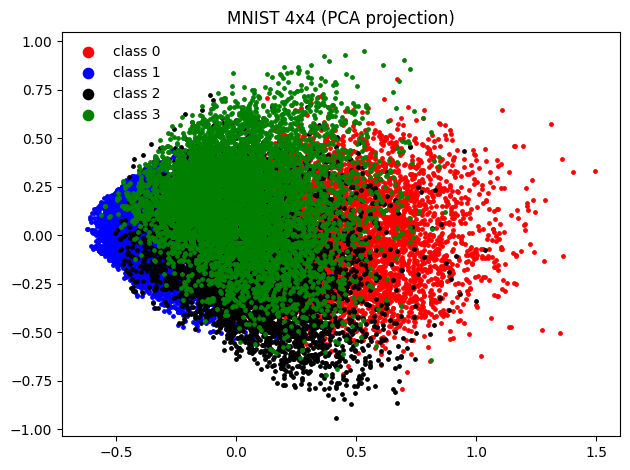

In [8]:


# 1) Load MNIST → 4x4 → {0,1,2,3}
Xtr, ytr, Xte, yte = load_mnist_4x4(global_seed=42)

# 2) Choose Dirichlet α for non-IIDness (α=10 ≈ IID, α=0.1 ≈ strongly non-IID)
n_clients = 10
alpha = 0.1           # try 10.0 for IID baseline
splits = dirichlet_split_indices(ytr, n_clients=n_clients, alpha=alpha, global_seed=42)

# 3) Build federated client datasets (your expected format)
client_data, X_client, Y_client = build_client_datasets(Xtr, ytr, splits)

# 4) Optional visualization for the paper (class colors as specified)
plot_2d_projection(Xtr, ytr, method="pca")


In [9]:
# ================================
# 5) Non-IID diagnostics & plots
# ================================
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, List

def _class_client_tables(y: np.ndarray, index_splits: List[np.ndarray]):
    """
    Returns:
      counts[K, M]: counts of class k in client m
      props[K, M]:  column-normalised proportions per client
    """
    classes = np.unique(y)
    K, M = len(classes), len(index_splits)
    counts = np.zeros((K, M), dtype=int)
    for m, idx in enumerate(index_splits):
        if idx.size == 0:
            continue
        ym = y[idx]
        for k, c in enumerate(classes):
            counts[k, m] = np.sum(ym == c)
    colsum = counts.sum(axis=0, keepdims=True).astype(float)
    props = np.divide(counts, np.where(colsum == 0, 1.0, colsum), where=colsum != 0)
    return counts, props, classes

def _shannon_entropy(p: np.ndarray, eps: float = 1e-12) -> np.ndarray:
    p = np.clip(p, eps, 1.0)
    return -(p*np.log(p)).sum(axis=0)  # entropy per client

def plot_noniid_summary(
    y: np.ndarray, index_splits: List[np.ndarray], class_names: Optional[List[str]] = None
):
    """(A) counts heatmap, (B) stacked proportions, (C) per-client entropy"""
    counts, props, classes = _class_client_tables(y, index_splits)
    K, M = counts.shape
    if class_names is None:
        class_names = [f"{int(c)}" for c in classes]
    x = np.arange(M)

    # (A) Heatmap of counts
    plt.figure(figsize=(6.0, 3.6))
    im = plt.imshow(counts, aspect="auto")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.yticks(np.arange(K), [f"class {cn}" for cn in class_names])
    plt.xticks(x, [f"C{m}" for m in x])
    plt.title("Class counts per client")
    plt.xlabel("Client"); plt.ylabel("Class")
    plt.tight_layout(); plt.show()

    # (B) Stacked proportions
    plt.figure(figsize=(6.0, 3.6))
    bottom = np.zeros(M)
    for k in range(K):
        plt.bar(x, props[k, :], bottom=bottom, label=f"class {class_names[k]}")
        bottom += props[k, :]
    plt.ylim(0, 1)
    plt.xticks(x, [f"C{m}" for m in x])
    plt.ylabel("Proportion"); plt.xlabel("Client")
    plt.title("Per-client class proportions")
    plt.legend(ncol=min(K, 4), fontsize=9, frameon=False)
    plt.tight_layout(); plt.show()

    # (C) Entropy per client (higher ≈ more IID)
    H = _shannon_entropy(props)
    plt.figure(figsize=(6.0, 3.0))
    plt.plot(x, H, marker="o")
    plt.xticks(x, [f"C{m}" for m in x])
    plt.ylabel("Shannon entropy"); plt.xlabel("Client")
    plt.title("Per-client class entropy (higher ≈ more IID)")
    plt.tight_layout(); plt.show()


In [10]:
def plot_pca_by_client(X: np.ndarray, index_splits: List[np.ndarray], max_points_per_client: int = 1000):
    from sklearn.decomposition import PCA
    Xs, cs = [], []
    for m, idx in enumerate(index_splits):
        if idx.size == 0:
            continue
        take = idx[:min(max_points_per_client, idx.size)]
        Xs.append(X[take])
        cs.append(np.full(take.size, m, dtype=int))
    if not Xs:
        print("No samples to plot."); return
    Xcat = np.concatenate(Xs, axis=0)
    ccat = np.concatenate(cs, axis=0)

    Z = PCA(n_components=2).fit_transform(Xcat)
    plt.figure(figsize=(6.0, 4.5))
    for m in np.unique(ccat):
        mask = (ccat == m)
        plt.scatter(Z[mask, 0], Z[mask, 1], s=6, label=f"Client {m}")
    plt.legend(markerscale=3, ncol=2, fontsize=9, frameon=False)
    plt.title("PCA(2D) coloured by client")
    plt.tight_layout(); plt.show()


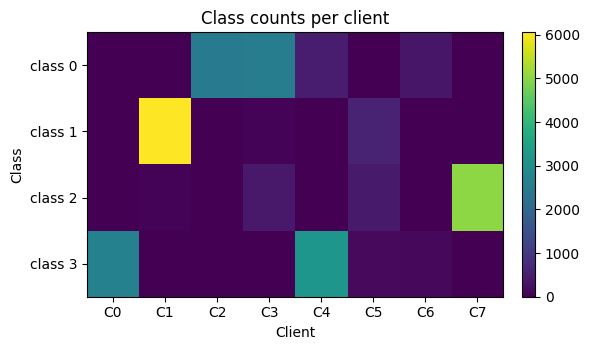

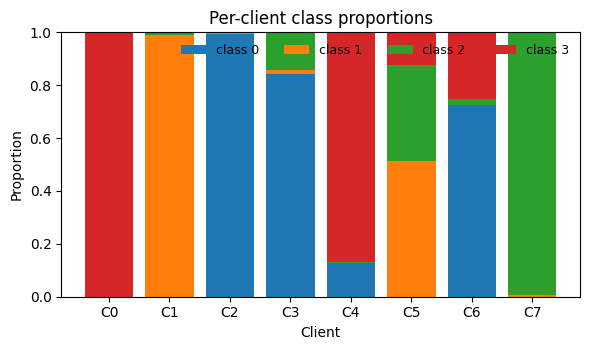

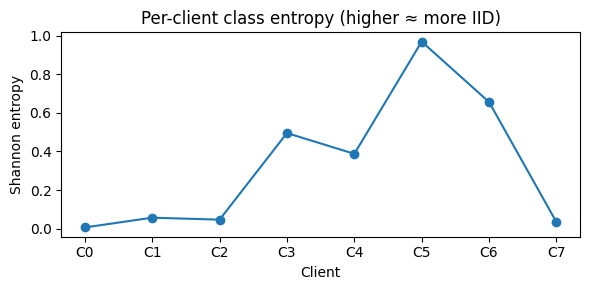

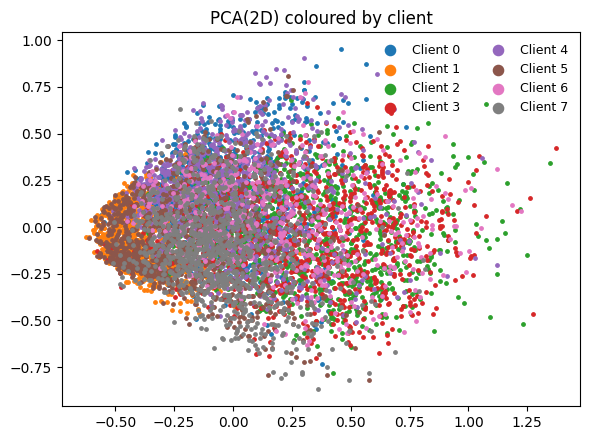

In [11]:
if __name__ == "__main__":
    # 1) Load 4×4 MNIST (digits {0,1,2,3})
    Xtr, ytr, Xte, yte = load_mnist_4x4()

    # 2) Create a Dirichlet non-IID split
    #    alpha small -> highly non-IID; alpha large -> near IID.
    n_clients = 8
    alpha = 0.1          # try 0.1 (very non-IID), 0.5 (moderate), 10.0 (≈ IID)
    splits = dirichlet_split_indices(ytr, n_clients=n_clients, alpha=alpha, global_seed=42)

    # 3) Visualise label skew across clients
    plot_noniid_summary(ytr, splits, class_names=["0","1","2","3"])

    # 4) Visualise feature-space separation by client
    plot_pca_by_client(Xtr, splits, max_points_per_client=1000)


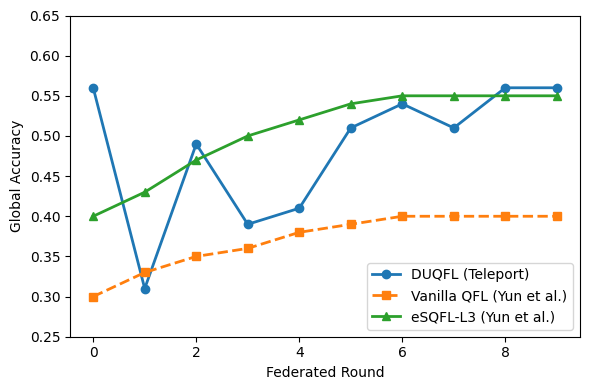

In [12]:
import matplotlib.pyplot as plt

rounds = list(range(10))
duqfl = [0.56,0.31,0.49,0.39,0.41,0.51,0.54,0.51,0.56,0.56]
vanilla_qfl = [0.30,0.33,0.35,0.36,0.38,0.39,0.40,0.40,0.40,0.40]
esqfl_l3 = [0.40,0.43,0.47,0.50,0.52,0.54,0.55,0.55,0.55,0.55]

plt.figure(figsize=(6,4))
plt.plot(rounds, duqfl, 'o-', label="DUQFL (Teleport)", linewidth=2)
plt.plot(rounds, vanilla_qfl, 's--', label="Vanilla QFL (Yun et al.)", linewidth=2)
plt.plot(rounds, esqfl_l3, '^-', label="eSQFL-L3 (Yun et al.)", linewidth=2)

plt.xlabel("Federated Round")
plt.ylabel("Global Accuracy")
plt.ylim(0.25,0.65)
plt.legend()
plt.tight_layout()
plt.show()
